In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette('hls',11)

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
LPOINT_LIST = glob.glob('LPOINT_BIG_COMP_*.csv')
LPOINT_LIST

['LPOINT_BIG_COMP_01_DEMO.csv',
 'LPOINT_BIG_COMP_02_PDDE.csv',
 'LPOINT_BIG_COMP_03_COP_U.csv',
 'LPOINT_BIG_COMP_04_PD_CLAC.csv',
 'LPOINT_BIG_COMP_05_BR.csv',
 'LPOINT_BIG_COMP_06_LPAY.csv']

### 01. 데이터_목록

In [3]:
DEMO = pd.read_csv(LPOINT_LIST[0])
PDDE = pd.read_csv(LPOINT_LIST[1])
PD_CLAC = pd.read_csv(LPOINT_LIST[3])

C:\Users\juyeo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 02. 데이터 파일별 분석

In [4]:
def groupby_want_col_count(data,col,stand):
    for i in col:
        pd_g = data.groupby([i]).count()
        pd_g = pd_g.sort_values(by=stand, ascending=False).head(20)
        plt.figure(figsize=(16,10))
        sns.barplot(x = pd_g.index,y =pd_g[stand].values, palette=color)
        plt.xticks(rotation=45)
        plt.title('%s'%i)
        plt.show()

### 02-1. LPOINT_BIG_COMP_01_DEMO.csv : 고객데모정보

In [5]:
DEMO.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


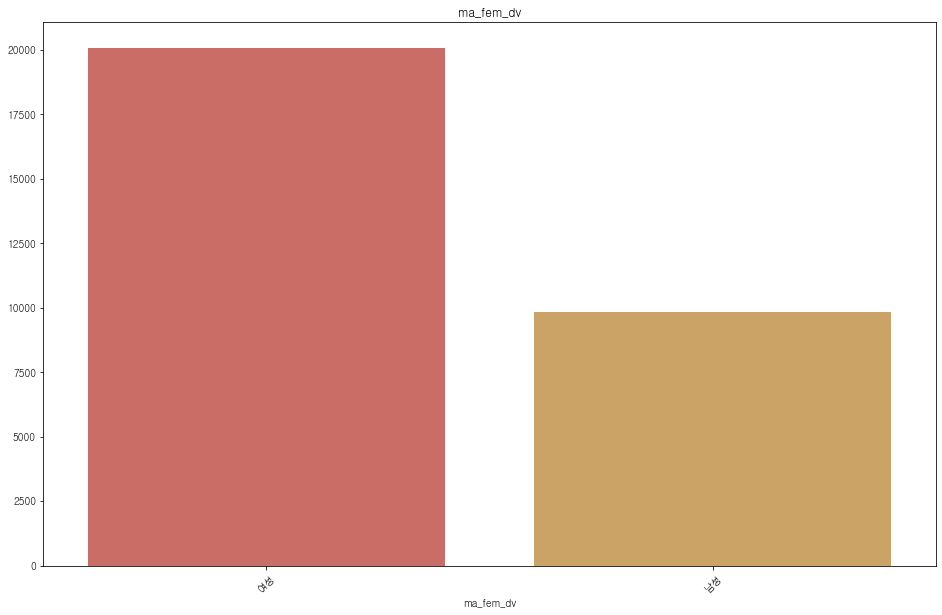

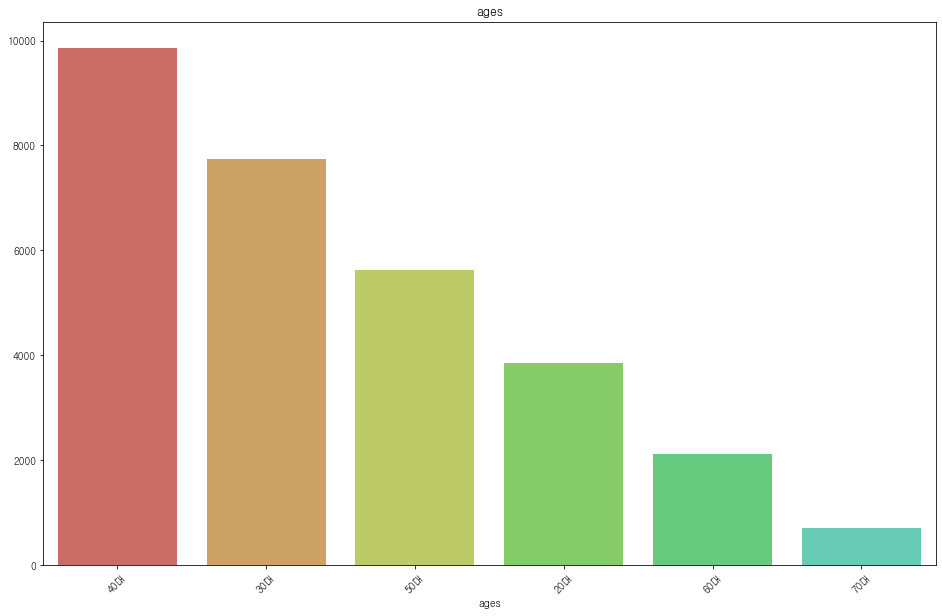

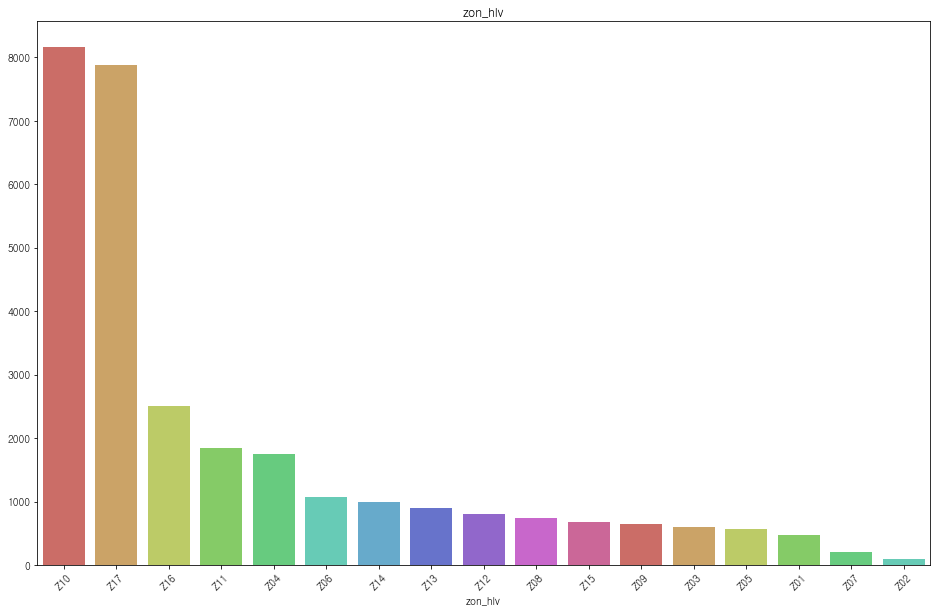

In [6]:
col = ['ma_fem_dv','ages','zon_hlv']
groupby_want_col_count(DEMO,col,'cust')

### 02-2. LPOINT_BIG_COMP_02_PDDE.csv : 상품구매정보

In [7]:
PDDE.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [ ]:
#온오프라인 구매
chnl_PD = PDDE.groupby(['chnl_dv']).count()

plt.pie(chnl_PD['cust'], labels=['오프라인','온라인'],colors=color,autopct='%.0f%%')
plt.title('온오프라인 구매 비율')
plt.show()

+ 오프라인 비율이 굉장히 높다

In [ ]:
col = ['chnl_dv','pd_c','cop_c','br_c','de_dt','de_hr']
groupby_want_col_count(PDDE,col,'cust')

### 02-3.LPOINT_BIG_COMP_04_PD_CLAC.csv : 점포정보

In [ ]:
PD_CLAC.head()

In [ ]:
#대분류
hlv = PD_CLAC.groupby(['clac_hlv_nm']).count()
hlv.head()

In [ ]:
#대분류 그래프

plt.figure(figsize=(16,10))
sns.barplot(x = hlv.index,y =hlv['pd_c'])
plt.xticks(rotation=45)
plt.title('clac_hlv_nm')

In [ ]:
#대분류 상위 10개 항목
hlv10 = hlv.sort_values(by='pd_c', ascending=False).head(10)

color = sns.color_palette('hls',11)
plt.figure(figsize=(10,6))
sns.barplot(x=hlv10.index, y = hlv10['pd_c'].values,palette = color)
plt.xticks(rotation=45)
plt.title('clac_hlv_nm_top_10')
plt.show()

In [ ]:
#대분류 상위 10개 항목의 중분류 비율
color = sns.color_palette('hls',10)

for i in hlv10.index:
    mcls = PD_CLAC[PD_CLAC['clac_hlv_nm'] == i].groupby(['clac_mcls_nm']).count()['pd_c']
    plt.pie(mcls, labels=mcls.index,colors=color,autopct='%.0f%%')
    plt.title('%s 중분류 비율'%i)
    plt.show()

### 대분류 상위 10개 항목에 대한 중분류 비율

- 패션 : 골고루 분포
- 축산 : 국산 소고기, 국산 돼지고기, 호주산 소고기의 비율이 높다
- 수산물 : 어류, 조개, 연체류가 높다
- 스포츠패션 : 여성 골프의류, 남성 골프의류가 높다 → 골프 부흥효과
- 문구 사무 : 일반 문구, 파티팬시, 필기도구 순서
- 채소 : 잎채소, 뿌리채소, 열매채소
- 유아동의류 : 골고루
- 과일 : 국산과일, 수입과일 (분류가 너무 크다)
- 속옷 양말 : 홈웨어, 여성속옷, 여성양말류가 높다 (여성 타겟)
- 조미료 : 조미료, 식용류, 소스가 높다 (조미료세트, 프리믹스를 제외하고는 어느정도 비율이 골고루)

### 03. 데이터 결합 후 탐색
1. DEMO + PDDE (cust)
2. PDDE + PD_CLAC (pd_c)
3. DEMO = PDDE + PD_CLAC (cust, pd_c)

### 03-1. 고객데모정보 + 상품구매정보 

In [ ]:
#고객데모정보 + 상품구매정보

DEMO_PDDE = pd.merge(DEMO,PDDE,on='cust',how='outer')
DEMO_PDDE.head()

In [ ]:
#상품구매정보 + 상품분류정보
PDDE_CLAC = pd.merge(PDDE,PD_CLAC,on='pd_c',how='outer')
PDDE_CLAC.head()

In [ ]:
#고객데모정보 + 상품구매정보 + 상품분류정보

DEMO_PDDE_CLAC = pd.merge(DEMO,PDDE_CLAC,on='cust',how='outer')
DEMO_PDDE_CLAC.head()

In [ ]:
#DEMO_PDDE_CLAC.to_csv('DEMO_PDDE_CLAC.csv',index=False)